## Data loading and Cleaning 

In [1]:
import pandas as pd

# Load the dataset
customer_data = pd.read_csv('customer_dataset.csv')

/var/folders/p1/z8dhpprj11b1w1rsyp3fh4zr0000gn/T/ipykernel_1954/3294755354.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv('customer_dataset.csv')


In [2]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


In [3]:
customer_data.count()

customer_id                        570000
average_monthly_spend              560614
average_monthly_visit_frequency    560672
average_monthly_basket_size        560714
dtype: int64

handling missing values

In [212]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 customer_id                           0
average_monthly_spend              9386
average_monthly_visit_frequency    9328
average_monthly_basket_size        9286
dtype: int64


In [ ]:
columns = ['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']

handling duplicates

In [216]:
# Check for duplicates
duplicate_rows = customer_data['customer_id'].duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 10000


In [217]:
# Remove duplicates based on 'customer_id'
customer_data.drop_duplicates(subset=['customer_id'], inplace=True)

In [ ]:
from sklearn.impute import IterativeImputer
# Apply Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=42)
customer_data[columns] = imputer.fit_transform(customer_data[columns])

In [218]:
# Check for duplicates
duplicate_rows = customer_data['customer_id'].duplicated().sum()
print("Duplicate Rows:", duplicate_rows)


Duplicate Rows: 0


In [213]:
# Drop rows with missing values
customer_data.dropna(inplace=True)

In [214]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64


In [215]:
customer_data.count()

customer_id                        542000
average_monthly_spend              542000
average_monthly_visit_frequency    542000
average_monthly_basket_size        542000
dtype: int64

In [219]:
# Check for duplicates
duplicate_rows = customer_data.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 0


In [220]:
customer_data[customer_data['customer_id'] == 244801]

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
244800,244801,4225.0,2.94,1.92


In [221]:
# Remove duplicates
customer_data.drop_duplicates(inplace=True)

In [222]:
customer_data.count()

customer_id                        532000
average_monthly_spend              532000
average_monthly_visit_frequency    532000
average_monthly_basket_size        532000
dtype: int64

handling outliers

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

descriptive visualization 

In [ ]:
# Generate boxplots to identify outliers
for column_name in columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=customer_data[column_name])
        plt.title(f'Boxplot for {column_name} (Log Transformed)')
        plt.show()

# Generate distribution plots
for column_name in columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(customer_data[column_name], kde=True)
        plt.title(f'Distribution Plot for {column_name} (Log Transformed)')
        plt.show()
    
# Generate pair plots to visualize relationships between features
sns.pairplot(customer_data[columns])
plt.suptitle('Pair Plot of Features (Log Transformed)', y=1.02)
plt.show()
    
    # Generate correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(customer_data[columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Log Transformed)')
plt.show()

In [ ]:
# Handle outliers using the IQR method
for column_name in columns:
        Q1 = customer_data[column_name].quantile(0.25)
        Q3 = customer_data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers
        customer_data[column_name] = np.where(customer_data[column_name] < lower_bound, lower_bound, customer_data[column_name])
        customer_data[column_name] = np.where(customer_data[column_name] > upper_bound, upper_bound, customer_data[column_name])

In [223]:
# Check for outliers and handle them if necessary
# (e.g., using z-score or IQR method)

handling non numerical values 

In [224]:
# Check if a specific column contains multiple data types
def check_mixed_types(series):
    types = series.map(type).unique()  # Maps the type function to all elements and gets unique types
    return len(types) > 1  # Returns True if more than one type is found

# Apply this check to each column in the DataFrame
mixed_type_columns = {col: check_mixed_types(customer_data[col]) for col in customer_data.columns}
print(mixed_type_columns)


{'customer_id': False, 'average_monthly_spend': True, 'average_monthly_visit_frequency': True, 'average_monthly_basket_size': False}


In [225]:
# Function to count types in a column
def type_counts(series):
    return series.apply(lambda x: type(x).__name__).value_counts()

# Apply this function to each column you want to analyze
type_breakdown = type_counts(customer_data['average_monthly_spend'])
print(type_breakdown)


average_monthly_spend
float    407441
str      124559
Name: count, dtype: int64


In [226]:
import pandas as pd

# Assuming customer_data is already loaded
# Create a mask where the type of the cell content is str
mask = customer_data['average_monthly_spend'].apply(lambda x: isinstance(x, str))

# Print the number of string entries found (for verification)
print("Number of string entries in 'average_monthly_spend':", mask.sum())

Number of string entries in 'average_monthly_spend': 124559


In [227]:
# customer_data_str = customer_data[mask]

In [228]:
# customer_data_str

In [229]:
# customer_data_str_digit_mask = customer_data_str['average_monthly_spend'].apply(lambda x: x.isdigit())

In [230]:
# customer_data_str_digit_mask

In [231]:
# def try_convert(x):
#     try:
#         return int(x)
#     except ValueError:
#         return None  # or return x to see the problematic value

# # Apply this function to the column
# customer_data_str['convertible'] = customer_data_str['average_monthly_spend'].apply(try_convert)

# # Filter to find rows where the conversion failed
# non_convertible_rows = customer_data_str[customer_data_str['convertible'].isnull()]

# print(non_convertible_rows)

In [232]:
from word2number import w2n

def smart_convert(x):
    try:
        return float(x)
    except ValueError:
        try:
            return w2n.word_to_num(x)
        except ValueError:
            return None  # Still return None if conversion fails

# Apply this smarter conversion function
customer_data['average_monthly_spend'] = customer_data['average_monthly_spend'].apply(smart_convert)

In [233]:
customer_data[customer_data['customer_id'] == 27]

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
26,27,900.0,1.9,1.24


In [234]:
# customer_data_int = customer_data[~mask]

In [235]:
# customer_data_int

In [236]:
# Verify the remaining data types in the column
print("Data types after cleanup:\n", customer_data['average_monthly_spend'].apply(type).value_counts())

Data types after cleanup:
 average_monthly_spend
<class 'float'>    532000
Name: count, dtype: int64


In [237]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04
5,6,172333.0,14.16,35.06
...,...,...,...,...
559995,559996,42002.0,5.1,9.72
559996,559997,11523.0,1.43,4.16
559997,559998,20502.0,7.02,9.23
559998,559999,3876.0,1.14,2.84


In [238]:
# Function to count types in a column
def type_counts(series):
    return series.apply(lambda x: type(x).__name__).value_counts()

# Apply this function to each column you want to analyze
type_breakdown = type_counts(customer_data['average_monthly_visit_frequency'])
print(type_breakdown)

average_monthly_visit_frequency
float    373583
str      158417
Name: count, dtype: int64


In [239]:
import pandas as pd

# Assuming customer_data is already loaded
# Create a mask where the type of the cell content is str
mask = customer_data['average_monthly_visit_frequency'].apply(lambda x: isinstance(x, str))

# Print the number of string entries found (for verification)
print("Number of string entries in 'average_monthly_visit_frequency':", mask.sum())

Number of string entries in 'average_monthly_visit_frequency': 158417


In [240]:
def try_convert(x):
    try:
        return float(x)
    except ValueError:
        return None  # or return x to see the problematic value

# Apply this function to the column
customer_data['convertible'] = customer_data['average_monthly_visit_frequency'].apply(try_convert)

# Filter to find rows where the conversion failed
non_convertible_rows = customer_data[customer_data['convertible'].isnull()]

print(non_convertible_rows)

        customer_id  average_monthly_spend average_monthly_visit_frequency  \
322986       322987                 8017.0                   one point two   
323648       323649                92323.0                 nine point five   
324577       324578                 6425.0                             two   
326775       326776                96690.0                      twenty two   

        average_monthly_basket_size  convertible  
322986                         4.00          NaN  
323648                        35.22          NaN  
324577                         3.62          NaN  
326775                        17.52          NaN  


In [241]:
from word2number import w2n

def smart_convert(x):
    try:
        return float(x)
    except ValueError:
        try:
            return w2n.word_to_num(x)
        except ValueError:
            return None  # Still return None if conversion fails

# Apply this smarter conversion function
customer_data['average_monthly_visit_frequency'] = customer_data['average_monthly_visit_frequency'].apply(smart_convert)

In [242]:
customer_data[customer_data['customer_id'] == 322987]

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,convertible
322986,322987,8017.0,1.2,4.0,NaN


In [243]:
customer_data.drop(['convertible'], axis=1, inplace=True)

In [244]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04
5,6,172333.0,14.16,35.06
...,...,...,...,...
559995,559996,42002.0,5.10,9.72
559996,559997,11523.0,1.43,4.16
559997,559998,20502.0,7.02,9.23
559998,559999,3876.0,1.14,2.84


In [245]:
customer_data_df = customer_data

In [246]:
customer_data.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,532000.000000,5.320000e+05,532000.000000,532000.000000
mean,280057.478981,4.825895e+04,6.879067,13.292778
std,161691.508182,9.173131e+04,5.323586,12.039068
min,1.000000,-1.233400e+04,-20.000000,-19.000000
25%,139923.750000,1.049900e+04,2.390000,3.800000
50%,280109.500000,3.196000e+04,5.600000,9.790000
75%,420172.250000,8.541850e+04,9.850000,17.480000
max,560000.000000,4.833000e+07,432.740000,385.040000


In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

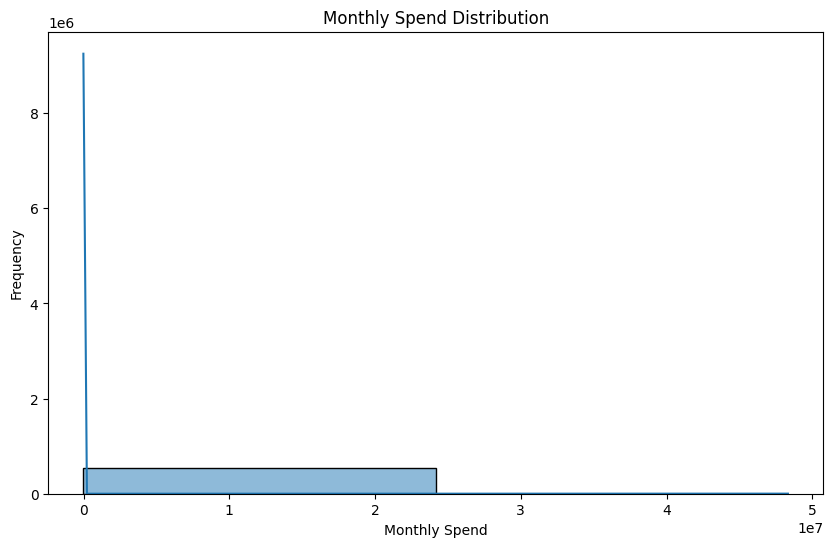

In [248]:
# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['average_monthly_spend'], bins=2, kde=True)
plt.title('Monthly Spend Distribution')
plt.xlabel('Monthly Spend')
plt.ylabel('Frequency')
plt.show()

In [249]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04
5,6,172333.0,14.16,35.06


## preprocessing and clustering 

In [250]:
# Generate new features
customer_data['average_spend_per_visit'] = customer_data['average_monthly_spend'] / customer_data['average_monthly_visit_frequency']
customer_data['spend_per_basket_size'] = customer_data['average_monthly_spend'] / customer_data['average_monthly_basket_size']
customer_data['visit_frequency_per_basket_size'] = customer_data['average_monthly_visit_frequency'] / customer_data['average_monthly_basket_size']

customer_data['spend_per_visit_per_basket_size'] = customer_data['average_spend_per_visit'] / customer_data['average_monthly_basket_size']
customer_data['visit_frequency_to_spend_ratio'] = customer_data['average_monthly_visit_frequency'] / customer_data['average_monthly_spend']

In [251]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_spend_per_visit,spend_per_basket_size,visit_frequency_per_basket_size,spend_per_visit_per_basket_size,visit_frequency_to_spend_ratio
0,1,790.0,1.11,2.84,711.711712,278.169014,0.390845,250.602715,0.001405
1,2,176875.0,15.74,33.83,11237.293520,5228.347620,0.465268,332.169480,0.000089
3,4,38542.0,7.82,10.73,4928.644501,3591.985089,0.728798,459.333132,0.000203
4,5,48712.0,7.51,10.04,6486.284953,4851.792829,0.748008,646.044318,0.000154
5,6,172333.0,14.16,35.06,12170.409605,4915.373645,0.403879,347.130907,0.000082
...,...,...,...,...,...,...,...,...,...
559995,559996,42002.0,5.10,9.72,8235.686275,4321.193416,0.524691,847.292827,0.000121
559996,559997,11523.0,1.43,4.16,8058.041958,2769.951923,0.343750,1937.029317,0.000124
559997,559998,20502.0,7.02,9.23,2920.512821,2221.235103,0.760563,316.415257,0.000342
559998,559999,3876.0,1.14,2.84,3400.000000,1364.788732,0.401408,1197.183099,0.000294


In [252]:
import numpy as np 

In [253]:
# Calculate percentiles
percentiles = [25, 50, 75, 90]

# Define thresholds for binary features based on percentiles
thresholds_spend_per_visit = np.percentile(customer_data['average_spend_per_visit'], percentiles)
thresholds_visit_frequency = np.percentile(customer_data['average_monthly_visit_frequency'], percentiles)

# Create binary features based on thresholds
for idx, percentile in enumerate(percentiles):
    customer_data[f'spend_per_visit_above_{percentile}th'] = (customer_data['average_spend_per_visit'] > thresholds_spend_per_visit[idx]).astype(int)
    customer_data[f'visit_frequency_above_{percentile}th'] = (customer_data['average_monthly_visit_frequency'] > thresholds_visit_frequency[idx]).astype(int)
    




In [254]:
customer_data.isna().sum()

customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
average_spend_per_visit            2
spend_per_basket_size              3
visit_frequency_per_basket_size    2
spend_per_visit_per_basket_size    3
visit_frequency_to_spend_ratio     2
spend_per_visit_above_25th         0
visit_frequency_above_25th         0
spend_per_visit_above_50th         0
visit_frequency_above_50th         0
spend_per_visit_above_75th         0
visit_frequency_above_75th         0
spend_per_visit_above_90th         0
visit_frequency_above_90th         0
dtype: int64

In [255]:
customer_data.dropna(inplace=True)

In [256]:
customer_data.isna().sum()

customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
average_spend_per_visit            0
spend_per_basket_size              0
visit_frequency_per_basket_size    0
spend_per_visit_per_basket_size    0
visit_frequency_to_spend_ratio     0
spend_per_visit_above_25th         0
visit_frequency_above_25th         0
spend_per_visit_above_50th         0
visit_frequency_above_50th         0
spend_per_visit_above_75th         0
visit_frequency_above_75th         0
spend_per_visit_above_90th         0
visit_frequency_above_90th         0
dtype: int64

In [257]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_spend_per_visit,spend_per_basket_size,visit_frequency_per_basket_size,spend_per_visit_per_basket_size,visit_frequency_to_spend_ratio,spend_per_visit_above_25th,visit_frequency_above_25th,spend_per_visit_above_50th,visit_frequency_above_50th,spend_per_visit_above_75th,visit_frequency_above_75th,spend_per_visit_above_90th,visit_frequency_above_90th
0,1,790.0,1.11,2.84,711.711712,278.169014,0.390845,250.602715,0.001405,0,0,0,0,0,0,0,0
1,2,176875.0,15.74,33.83,11237.293520,5228.347620,0.465268,332.169480,0.000089,0,1,0,1,0,1,0,1
3,4,38542.0,7.82,10.73,4928.644501,3591.985089,0.728798,459.333132,0.000203,0,1,0,1,0,0,0,0
4,5,48712.0,7.51,10.04,6486.284953,4851.792829,0.748008,646.044318,0.000154,0,1,0,1,0,0,0,0
5,6,172333.0,14.16,35.06,12170.409605,4915.373645,0.403879,347.130907,0.000082,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559995,559996,42002.0,5.10,9.72,8235.686275,4321.193416,0.524691,847.292827,0.000121,0,1,0,0,0,0,0,0
559996,559997,11523.0,1.43,4.16,8058.041958,2769.951923,0.343750,1937.029317,0.000124,0,0,0,0,0,0,0,0
559997,559998,20502.0,7.02,9.23,2920.512821,2221.235103,0.760563,316.415257,0.000342,0,1,0,1,0,0,0,0
559998,559999,3876.0,1.14,2.84,3400.000000,1364.788732,0.401408,1197.183099,0.000294,0,0,0,0,0,0,0,0


In [258]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size', 'average_spend_per_visit',	'spend_per_basket_size',	"visit_frequency_per_basket_size",	"spend_per_visit_per_basket_size"]])
customer_data[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size', 'average_spend_per_visit',	'spend_per_basket_size',	"visit_frequency_per_basket_size",	"spend_per_visit_per_basket_size",	]] = scaled_features

# Derived metrics (if needed)
# e.g., customer_data['spend_per_visit'] = customer_data['monthly_spend'] / customer_data['monthly_visit_frequency']


In [259]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_spend_per_visit,spend_per_basket_size,visit_frequency_per_basket_size,spend_per_visit_per_basket_size,visit_frequency_to_spend_ratio,spend_per_visit_above_25th,visit_frequency_above_25th,spend_per_visit_above_50th,visit_frequency_above_50th,spend_per_visit_above_75th,visit_frequency_above_75th,spend_per_visit_above_90th,visit_frequency_above_90th
0,1,-0.517481,-1.083689,-0.868246,-0.143425,-0.200343,-0.734643,-0.073921,0.001405,0,0,0,0,0,0,0,0
1,2,1.402091,1.664464,1.705878,0.134118,0.103249,-0.532622,-0.064756,0.000089,0,1,0,1,0,1,0,1
3,4,-0.105931,0.176742,-0.212878,-0.032231,0.002891,0.182735,-0.050469,0.000203,0,1,0,1,0,0,0,0
4,5,0.004936,0.118510,-0.270192,0.008841,0.080155,0.234882,-0.029490,0.000154,0,1,0,1,0,0,0,0
5,6,1.352577,1.367671,1.808045,0.158723,0.084054,-0.699262,-0.063075,0.000082,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559995,559996,-0.068212,-0.334193,-0.296772,0.054970,0.047613,-0.371315,-0.006879,0.000121,0,1,0,0,0,0,0,0
559996,559997,-0.400476,-1.023579,-0.758603,0.050286,-0.047523,-0.862483,0.115561,0.000124,0,0,0,0,0,0,0,0
559997,559998,-0.302592,0.026467,-0.337473,-0.085183,-0.081176,0.268964,-0.066526,0.000342,0,1,0,1,0,0,0,0
559998,559999,-0.483839,-1.078053,-0.868246,-0.072539,-0.133701,-0.705968,0.032434,0.000294,0,0,0,0,0,0,0,0


In [260]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_spend_per_visit,spend_per_basket_size,visit_frequency_per_basket_size,spend_per_visit_per_basket_size,visit_frequency_to_spend_ratio,spend_per_visit_above_25th,visit_frequency_above_25th,spend_per_visit_above_50th,visit_frequency_above_50th,spend_per_visit_above_75th,visit_frequency_above_75th,spend_per_visit_above_90th,visit_frequency_above_90th
0,1,-0.517481,-1.083689,-0.868246,-0.143425,-0.200343,-0.734643,-0.073921,0.001405,0,0,0,0,0,0,0,0
1,2,1.402091,1.664464,1.705878,0.134118,0.103249,-0.532622,-0.064756,0.000089,0,1,0,1,0,1,0,1
3,4,-0.105931,0.176742,-0.212878,-0.032231,0.002891,0.182735,-0.050469,0.000203,0,1,0,1,0,0,0,0
4,5,0.004936,0.118510,-0.270192,0.008841,0.080155,0.234882,-0.029490,0.000154,0,1,0,1,0,0,0,0
5,6,1.352577,1.367671,1.808045,0.158723,0.084054,-0.699262,-0.063075,0.000082,0,1,0,1,0,1,0,0


In [261]:
customer_data.columns

Index(['customer_id', 'average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       'visit_frequency_to_spend_ratio', 'spend_per_visit_above_25th',
       'visit_frequency_above_25th', 'spend_per_visit_above_50th',
       'visit_frequency_above_50th', 'spend_per_visit_above_75th',
       'visit_frequency_above_75th', 'spend_per_visit_above_90th',
       'visit_frequency_above_90th'],
      dtype='object')

In [262]:
# from sklearn.cluster import DBSCAN
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# # Select the columns to use for clustering
# cluster_data = customer_data[['average_monthly_spend',
#        'average_monthly_visit_frequency', 'average_monthly_basket_size',
#        'average_spend_per_visit', 'spend_per_basket_size',
#        'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size', 'spend_per_visit_above_25th',
#        'visit_frequency_above_25th', 'spend_per_visit_above_50th',
#        'visit_frequency_above_50th', 'spend_per_visit_above_75th',
#        'visit_frequency_above_75th', 'spend_per_visit_above_90th',
#        'visit_frequency_above_90th']]


# # Create a DBSCAN model with eps=0.5 and min_samples=5
# dbscan = DBSCAN(eps=0.5,min_samples=50, n_jobs=-1)

# # Fit the model to the data
# dbscan.fit(cluster_data)

# # Assign each outlet to a cluster
# customer_data['cluster'] = dbscan.labels_



# # Fit the model to the data
# dbscan.fit(cluster_data)

# # inertia = dbscan.inertia_

# # Get the cluster labels
# labels = dbscan.labels_

# # Calculate the silhouette score of the model
# silhouette = silhouette_score(cluster_data, labels)

# # Calculate the Davies-Bouldin index of the model
# davies_bouldin = davies_bouldin_score(cluster_data, labels)

# # Calculate the Calinski-Harabasz index of the model
# calinski_harabasz = calinski_harabasz_score(cluster_data, labels)

# # Print the values of the evaluation metrics
# # print(f'Inertia: {inertia}')
# print(f'Silhouette Score: {silhouette}')
# print(f'Davies-Bouldin Index: {davies_bouldin}')
# print(f'Calinski-Harabasz Index: {calinski_harabasz}')

In [263]:
# Model Selection (e.g., K-means clustering)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

cluster_data = customer_data[['average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size', 'spend_per_visit_above_25th',
       'visit_frequency_above_25th', 'spend_per_visit_above_50th',
       'visit_frequency_above_50th', 'spend_per_visit_above_75th',
       'visit_frequency_above_75th', 'spend_per_visit_above_90th',
       'visit_frequency_above_90th']]

kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(cluster_data)

# Assign each outlet to a cluster
customer_data['cluster'] = kmeans.labels_

# Get the cluster labels
labels = kmeans.labels_

# Calculate the inertia of the model
inertia = kmeans.inertia_

# Calculate the silhouette score of the model
silhouette = silhouette_score(cluster_data, labels)

# Calculate the Davies-Bouldin index of the model
davies_bouldin = davies_bouldin_score(cluster_data, labels)

# Calculate the Calinski-Harabasz index of the model
calinski_harabasz = calinski_harabasz_score(cluster_data, labels)

# Print the values of the evaluation metrics
print(f'Inertia: {inertia}')
print(f'Silhouette Score: {silhouette}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(customer_data['cluster'].unique())

Inertia: 691516.6460453557
Silhouette Score: 0.558881345467024
Davies-Bouldin Index: 0.5279715686411247
Calinski-Harabasz Index: 656386.9060104671
[0 1 2 4 3]


In [270]:
# from sklearn.cluster import OPTICS

# cluster_data = customer_data[['average_monthly_spend',
#        'average_monthly_visit_frequency', 'average_monthly_basket_size',
#        'average_spend_per_visit', 'spend_per_basket_size',
#        'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size', 'spend_per_visit_above_25th',
#        'visit_frequency_above_25th', 'spend_per_visit_above_50th',
#        'visit_frequency_above_50th', 'spend_per_visit_above_75th',
#        'visit_frequency_above_75th', 'spend_per_visit_above_90th',
#        'visit_frequency_above_90th']]
# # features = ['area(sqft)']
# # Create an instance of the OPTICS class
# optics = OPTICS(min_samples=50, xi=0.05)

# # Fit the model to the data
# optics.fit(cluster_data)

# # Assign each outlet to a cluster
# customer_data['cluster'] = optics.labels_


# # Get the cluster labels
# labels = optics.labels_

# # Calculate the silhouette score of the model
# silhouette = silhouette_score(cluster_data, labels)

# # Calculate the Davies-Bouldin index of the model
# davies_bouldin = davies_bouldin_score(cluster_data, labels)

# # Calculate the Calinski-Harabasz index of the model
# calinski_harabasz = calinski_harabasz_score(cluster_data, labels)

# # Print the values of the evaluation metrics
# print(f'Silhouette Score: {silhouette}')
# print(f'Davies-Bouldin Index: {davies_bouldin}')
# print(f'Calinski-Harabasz Index: {calinski_harabasz}')
# print(customer_data['cluster'].unique())

## Clustering evaluation

In [264]:
customer_data.columns

Index(['customer_id', 'average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       'visit_frequency_to_spend_ratio', 'spend_per_visit_above_25th',
       'visit_frequency_above_25th', 'spend_per_visit_above_50th',
       'visit_frequency_above_50th', 'spend_per_visit_above_75th',
       'visit_frequency_above_75th', 'spend_per_visit_above_90th',
       'visit_frequency_above_90th', 'cluster'],
      dtype='object')

In [265]:
customer_data['cluster']

0         0
1         1
3         0
4         0
5         1
         ..
559995    0
559996    0
559997    0
559998    0
559999    0
Name: cluster, Length: 531997, dtype: int32

## Percentile evaluation

In [273]:
customer_data_df

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_spend_per_visit,spend_per_basket_size,visit_frequency_per_basket_size,spend_per_visit_per_basket_size,visit_frequency_to_spend_ratio,spend_per_visit_above_25th,visit_frequency_above_25th,spend_per_visit_above_50th,visit_frequency_above_50th,spend_per_visit_above_75th,visit_frequency_above_75th,spend_per_visit_above_90th,visit_frequency_above_90th,cluster
0,1,-0.517481,-1.083689,-0.868246,-0.143425,-0.200343,-0.734643,-0.073921,0.001405,0,0,0,0,0,0,0,0,0
1,2,1.402091,1.664464,1.705878,0.134118,0.103249,-0.532622,-0.064756,0.000089,0,1,0,1,0,1,0,1,1
3,4,-0.105931,0.176742,-0.212878,-0.032231,0.002891,0.182735,-0.050469,0.000203,0,1,0,1,0,0,0,0,0
4,5,0.004936,0.118510,-0.270192,0.008841,0.080155,0.234882,-0.029490,0.000154,0,1,0,1,0,0,0,0,0
5,6,1.352577,1.367671,1.808045,0.158723,0.084054,-0.699262,-0.063075,0.000082,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559995,559996,-0.068212,-0.334193,-0.296772,0.054970,0.047613,-0.371315,-0.006879,0.000121,0,1,0,0,0,0,0,0,0
559996,559997,-0.400476,-1.023579,-0.758603,0.050286,-0.047523,-0.862483,0.115561,0.000124,0,0,0,0,0,0,0,0,0
559997,559998,-0.302592,0.026467,-0.337473,-0.085183,-0.081176,0.268964,-0.066526,0.000342,0,1,0,1,0,0,0,0,0
559998,559999,-0.483839,-1.078053,-0.868246,-0.072539,-0.133701,-0.705968,0.032434,0.000294,0,0,0,0,0,0,0,0,0


In [272]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_spend_per_visit,spend_per_basket_size,visit_frequency_per_basket_size,spend_per_visit_per_basket_size,visit_frequency_to_spend_ratio,spend_per_visit_above_25th,visit_frequency_above_25th,spend_per_visit_above_50th,visit_frequency_above_50th,spend_per_visit_above_75th,visit_frequency_above_75th,spend_per_visit_above_90th,visit_frequency_above_90th,cluster
0,1,-0.517481,-1.083689,-0.868246,-0.143425,-0.200343,-0.734643,-0.073921,0.001405,0,0,0,0,0,0,0,0,0
1,2,1.402091,1.664464,1.705878,0.134118,0.103249,-0.532622,-0.064756,0.000089,0,1,0,1,0,1,0,1,1
3,4,-0.105931,0.176742,-0.212878,-0.032231,0.002891,0.182735,-0.050469,0.000203,0,1,0,1,0,0,0,0,0
4,5,0.004936,0.118510,-0.270192,0.008841,0.080155,0.234882,-0.029490,0.000154,0,1,0,1,0,0,0,0,0
5,6,1.352577,1.367671,1.808045,0.158723,0.084054,-0.699262,-0.063075,0.000082,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559995,559996,-0.068212,-0.334193,-0.296772,0.054970,0.047613,-0.371315,-0.006879,0.000121,0,1,0,0,0,0,0,0,0
559996,559997,-0.400476,-1.023579,-0.758603,0.050286,-0.047523,-0.862483,0.115561,0.000124,0,0,0,0,0,0,0,0,0
559997,559998,-0.302592,0.026467,-0.337473,-0.085183,-0.081176,0.268964,-0.066526,0.000342,0,1,0,1,0,0,0,0,0
559998,559999,-0.483839,-1.078053,-0.868246,-0.072539,-0.133701,-0.705968,0.032434,0.000294,0,0,0,0,0,0,0,0,0


In [267]:
merged_data = pd.merge(customer_data_df, customer_data[['customer_id', 'cluster']], on='customer_id', how='left')

In [268]:
merged_data 

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_spend_per_visit,spend_per_basket_size,visit_frequency_per_basket_size,spend_per_visit_per_basket_size,visit_frequency_to_spend_ratio,spend_per_visit_above_25th,visit_frequency_above_25th,spend_per_visit_above_50th,visit_frequency_above_50th,spend_per_visit_above_75th,visit_frequency_above_75th,spend_per_visit_above_90th,visit_frequency_above_90th,cluster_x,cluster_y
0,1,-0.517481,-1.083689,-0.868246,-0.143425,-0.200343,-0.734643,-0.073921,0.001405,0,0,0,0,0,0,0,0,0,0
1,2,1.402091,1.664464,1.705878,0.134118,0.103249,-0.532622,-0.064756,0.000089,0,1,0,1,0,1,0,1,1,1
2,4,-0.105931,0.176742,-0.212878,-0.032231,0.002891,0.182735,-0.050469,0.000203,0,1,0,1,0,0,0,0,0,0
3,5,0.004936,0.118510,-0.270192,0.008841,0.080155,0.234882,-0.029490,0.000154,0,1,0,1,0,0,0,0,0,0
4,6,1.352577,1.367671,1.808045,0.158723,0.084054,-0.699262,-0.063075,0.000082,0,1,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531992,559996,-0.068212,-0.334193,-0.296772,0.054970,0.047613,-0.371315,-0.006879,0.000121,0,1,0,0,0,0,0,0,0,0
531993,559997,-0.400476,-1.023579,-0.758603,0.050286,-0.047523,-0.862483,0.115561,0.000124,0,0,0,0,0,0,0,0,0,0
531994,559998,-0.302592,0.026467,-0.337473,-0.085183,-0.081176,0.268964,-0.066526,0.000342,0,1,0,1,0,0,0,0,0,0
531995,559999,-0.483839,-1.078053,-0.868246,-0.072539,-0.133701,-0.705968,0.032434,0.000294,0,0,0,0,0,0,0,0,0,0


In [271]:
merged_data.groupby('cluster').describe()

KeyError: 'cluster'